In [42]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima,ARIMA,model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv("../data/preprocessed_data.csv",index_col='date',parse_dates=True,dayfirst=True)
df.head()

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27%,1.09%,NaN
2018-01-02,8922076.0,30.87%,1.08%,2651237.0
2018-01-03,8446101.0,28.11%,1.01%,-475975.0
2018-01-04,7785798.0,27.32%,0.96%,-660303.0
2018-01-05,6375303.0,25.70%,0.90%,-1410495.0


In [81]:
periods = 30
train,test = df.iloc[:-periods],df.iloc[-periods:]

In [85]:
train.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
               '2022-10-30', '2022-10-31'],
              dtype='datetime64[ns]', name='date', length=1765, freq=None)

In [83]:
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

In [84]:
train

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27%,1.09%,NaN
2018-01-02,8922076.0,30.87%,1.08%,2651237.0
2018-01-03,8446101.0,28.11%,1.01%,-475975.0
2018-01-04,7785798.0,27.32%,0.96%,-660303.0
2018-01-05,6375303.0,25.70%,0.90%,-1410495.0
...,...,...,...,...
2022-10-27,13714667.0,20.81%,0.61%,-1352362.0
2022-10-28,12100780.0,21.44%,0.55%,-1613887.0
2022-10-29,11849363.0,19.81%,0.36%,-251417.0


# ARIMA

In [43]:
arima_model = auto_arima(train['y'],
                         seasonal=False)

In [44]:
predictions_arims = arima_model.predict(n_periods=periods)
predictions_arims

2022-11-01    1.445299e+07
2022-11-02    1.474103e+07
2022-11-03    1.503283e+07
2022-11-04    1.527520e+07
2022-11-05    1.534078e+07
2022-11-06    1.553442e+07
2022-11-07    1.554542e+07
2022-11-08    1.563967e+07
2022-11-09    1.565016e+07
2022-11-10    1.569221e+07
2022-11-11    1.570256e+07
2022-11-12    1.571953e+07
2022-11-13    1.572734e+07
2022-11-14    1.573420e+07
2022-11-15    1.573904e+07
2022-11-16    1.574197e+07
2022-11-17    1.574462e+07
2022-11-18    1.574600e+07
2022-11-19    1.574734e+07
2022-11-20    1.574804e+07
2022-11-21    1.574869e+07
2022-11-22    1.574906e+07
2022-11-23    1.574937e+07
2022-11-24    1.574956e+07
2022-11-25    1.574971e+07
2022-11-26    1.574981e+07
2022-11-27    1.574988e+07
2022-11-28    1.574994e+07
2022-11-29    1.574997e+07
2022-11-30    1.575000e+07
Freq: D, dtype: float64

In [34]:
def model_assessment(train,test,predictions,title=None,path=None):
    plt.subplots(figsize=(14,6))
    plt.plot(train,label="Train")
    plt.plot(test,label="Test")
    plt.plot(predictions,label="Forecast")
    plt.title(title)
    plt.legend()
    plt.savefig(f"../visualizations/Forecast/{path}.png")
    plt.show()
    
    mae = mean_absolute_error(test,predictions)
    mape = mean_absolute_percentage_error(test,predictions)
    rmse = root_mean_squared_error(test,predictions)
    
    print("MAE",mae)
    print("RMSE",rmse)
    print("MAPE",mape)

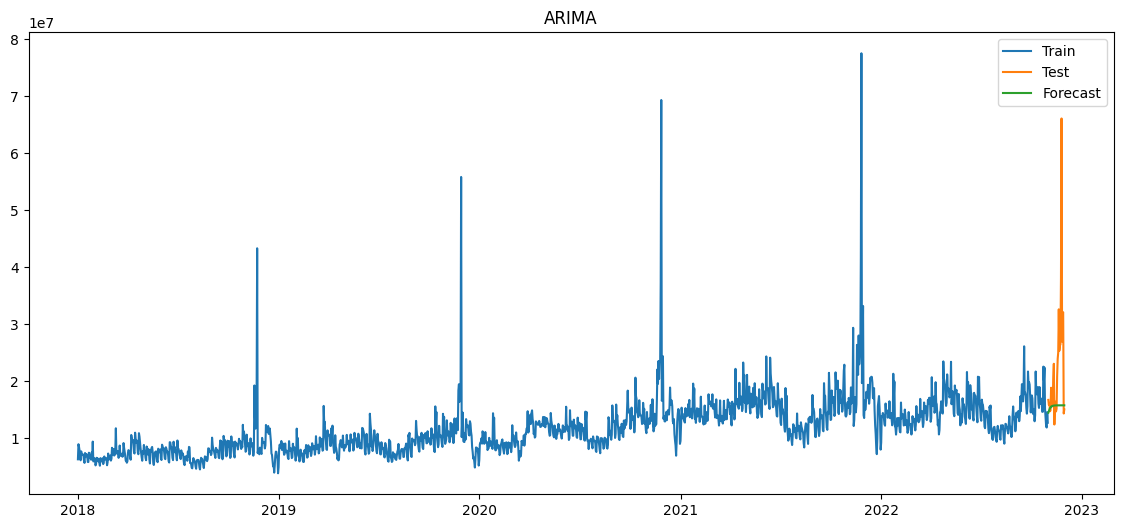

MAE 7267306.024263437
RMSE 12366038.29993861
MAPE 0.241461145875348


In [47]:
model_assessment(train=train.y,test=test.y,predictions=predictions_arims,title="ARIMA",path="model_arima")

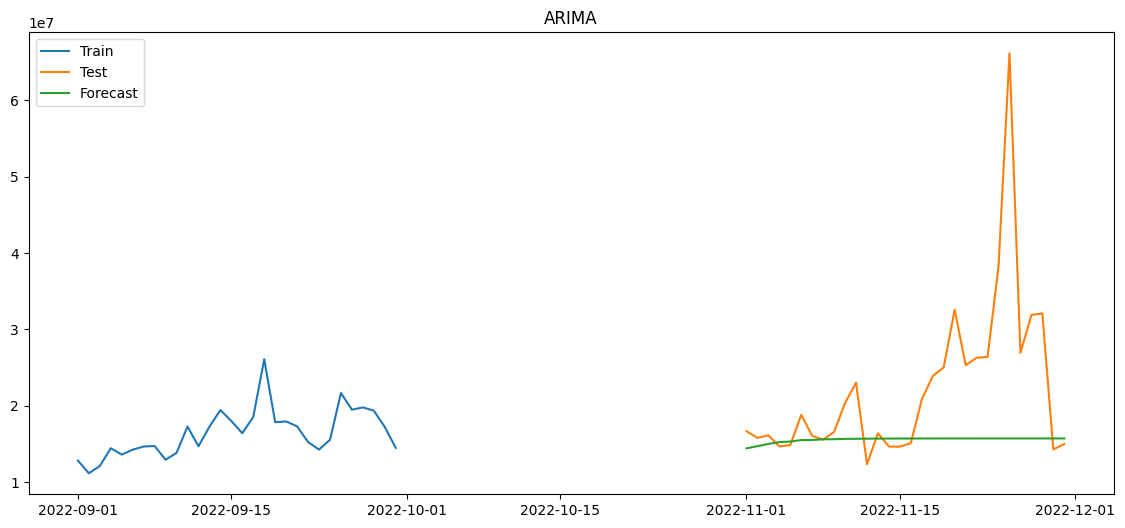

MAE 7267306.024263437
RMSE 12366038.29993861
MAPE 0.241461145875348


In [48]:
model_assessment(train['y']['2022-09'],test['y'],predictions_arims,"ARIMA","model_arima_zoomed")

# SARIMA

In [45]:
model_sarima = auto_arima(train['y'],m = 7)
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1765
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 7)   Log Likelihood              -28762.051
Date:                           Mon, 10 Mar 2025   AIC                          57546.103
Time:                                   20:51:11   BIC                          57606.331
Sample:                               01-01-2018   HQIC                         57568.358
                                    - 10-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   4682.761      2.150      0.032     890.275    1.92e+04
ar.L1         -0.3476      0.072     -4.797      0.000      -0.490      -0.206
ar.L2          0.1856      0.032      5.722      0.000       0.122       0.249
ar.L3          0.1034      0.016      6.523      0.000       0.072       0.135
ma.L1         -0.1958      0.074     -2.656      0.008      -0.340      -0.051
ma.L2         -0.5684      0.060     -9.400      0.000      -0.687      -0.450
ar.S.L7        0.0805      0.181      0.445      0.656      -0.274       0.435
ar.S.L14       0.8713      0.172      5.071      0.000       0.534       1.208
ma.S.L7       -0.0035      0.176     -0.020      0.984      -0.349       0.342
ma.S.L14      -0.8322      0.157     -5.310      0.000      -1.139      -0.525
sigma2      9.294e+12      0.000   8.85e+16      0.000    9.29e+12    9.29e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            848655.01
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                             5.24
Prob(H) (two-sided):                  0.00   Kurtosis:                       109.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.07e+30. Standard errors may be unstable.
"""

In [46]:
predictions_sarima = model_sarima.predict(n_periods=len(test))
predictions_sarima

2022-11-01    1.513411e+07
2022-11-02    1.504534e+07
2022-11-03    1.464457e+07
2022-11-04    1.382187e+07
2022-11-05    1.398001e+07
2022-11-06    1.697855e+07
2022-11-07    1.583308e+07
2022-11-08    1.605211e+07
2022-11-09    1.575797e+07
2022-11-10    1.523585e+07
2022-11-11    1.428027e+07
2022-11-12    1.448986e+07
2022-11-13    1.761291e+07
2022-11-14    1.658423e+07
2022-11-15    1.682759e+07
2022-11-16    1.635487e+07
2022-11-17    1.582120e+07
2022-11-18    1.482105e+07
2022-11-19    1.499263e+07
2022-11-20    1.780770e+07
2022-11-21    1.673572e+07
2022-11-22    1.694582e+07
2022-11-23    1.665825e+07
2022-11-24    1.616896e+07
2022-11-25    1.526419e+07
2022-11-26    1.547008e+07
2022-11-27    1.842691e+07
2022-11-28    1.745385e+07
2022-11-29    1.769225e+07
2022-11-30    1.726673e+07
Freq: D, dtype: float64

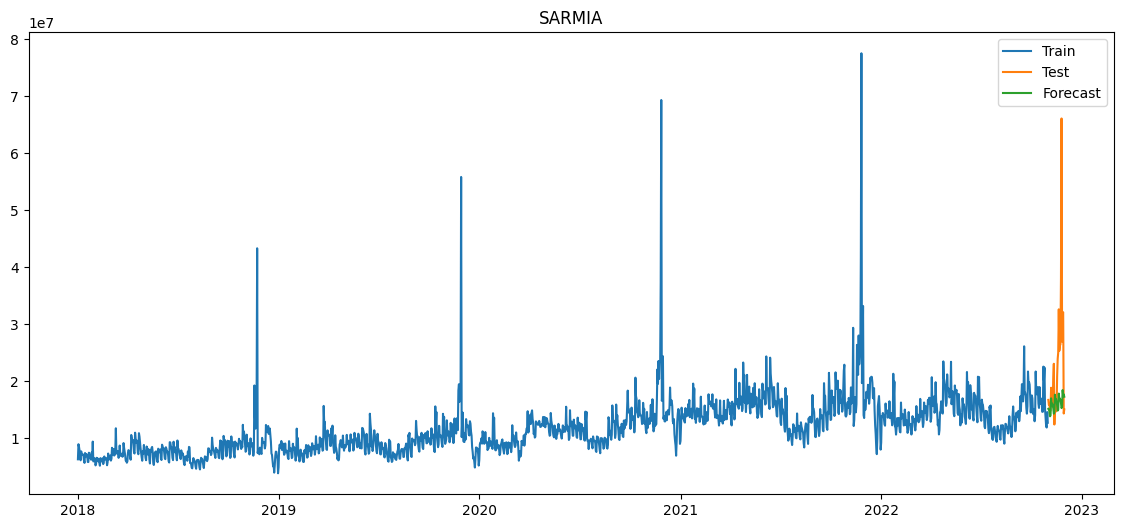

MAE 7210543.983525436
RMSE 12152386.469468849
MAPE 0.24536495629219485


In [51]:
model_assessment(train['y'],test['y'],predictions_sarima,"SARMIA","model_sarima_pred")

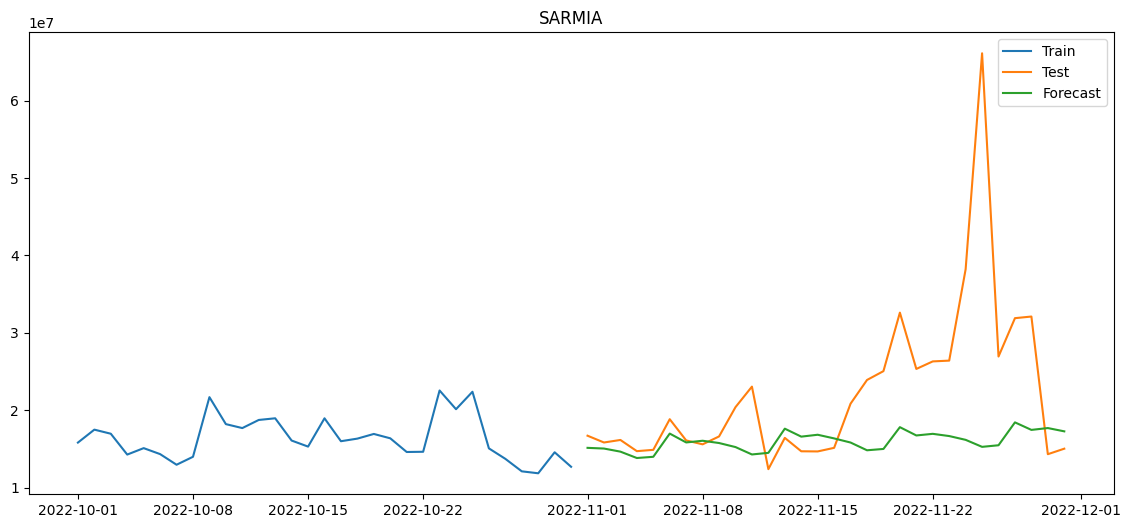

MAE 7210543.983525436
RMSE 12152386.469468849
MAPE 0.24536495629219485


In [52]:
model_assessment(train['y']['2022-10'],test['y'],predictions_sarima,"SARMIA","model_sarima_pred_zoomed")

# SARIMA

### Transform regressors into float

In [55]:
df['coupon_rate'] = df['coupon_rate'].str.replace('%','').astype(float)
df['discount_rate'] = df['discount_rate'].str.replace('%','').astype(float)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, 2018-01-01 to 2022-11-30
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   y              1795 non-null   float64
 1   discount_rate  1795 non-null   float64
 2   coupon_rate    1795 non-null   float64
 3   y_diff         1794 non-null   float64
dtypes: float64(4)
memory usage: 134.7+ KB


In [57]:
df.head()

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27,1.09,NaN
2018-01-02,8922076.0,30.87,1.08,2651237.0
2018-01-03,8446101.0,28.11,1.01,-475975.0
2018-01-04,7785798.0,27.32,0.96,-660303.0
2018-01-05,6375303.0,25.70,0.90,-1410495.0


In [73]:
periods = 30
exog_train = df.iloc[:-periods,1:3]
exog_test = df.iloc[-periods:,1:3]

In [78]:
exog_train.head()

,discount_rate,coupon_rate
date,,
2018-01-01,34.27,1.09
2018-01-02,30.87,1.08
2018-01-03,28.11,1.01
2018-01-04,27.32,0.96
2018-01-05,25.70,0.90


In [86]:
train.head()

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27%,1.09%,NaN
2018-01-02,8922076.0,30.87%,1.08%,2651237.0
2018-01-03,8446101.0,28.11%,1.01%,-475975.0
2018-01-04,7785798.0,27.32%,0.96%,-660303.0
2018-01-05,6375303.0,25.70%,0.90%,-1410495.0


In [74]:
exog_train.index = pd.to_datetime(train.index)
exog_test.index = pd.to_datetime(test.index)

In [75]:
exog_test.index

DatetimeIndex(['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08',
               '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12',
               '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16',
               '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-20',
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='date', freq=None)

In [87]:
model_sarimax = auto_arima(train['y'],m=7,X=exog_train)

In [89]:
predictions_sarimax = model_sarimax.predict(n_periods = len(test),X = exog_test)
predictions_sarimax

2022-11-01    1.675219e+07
2022-11-02    1.494566e+07
2022-11-03    1.488437e+07
2022-11-04    1.296426e+07
2022-11-05    1.205474e+07
2022-11-06    1.394981e+07
2022-11-07    1.341731e+07
2022-11-08    1.328259e+07
2022-11-09    1.441189e+07
2022-11-10    2.077603e+07
2022-11-11    2.121871e+07
2022-11-12    1.346342e+07
2022-11-13    1.489144e+07
2022-11-14    1.299958e+07
2022-11-15    1.348112e+07
2022-11-16    1.398075e+07
2022-11-17    1.803934e+07
2022-11-18    1.675141e+07
2022-11-19    1.712348e+07
2022-11-20    1.980816e+07
2022-11-21    1.847933e+07
2022-11-22    1.908260e+07
2022-11-23    1.913665e+07
2022-11-24    2.068950e+07
2022-11-25    1.926337e+07
2022-11-26    1.851313e+07
2022-11-27    2.073292e+07
2022-11-28    2.608038e+07
2022-11-29    1.588331e+07
2022-11-30    1.480002e+07
Freq: D, dtype: float64

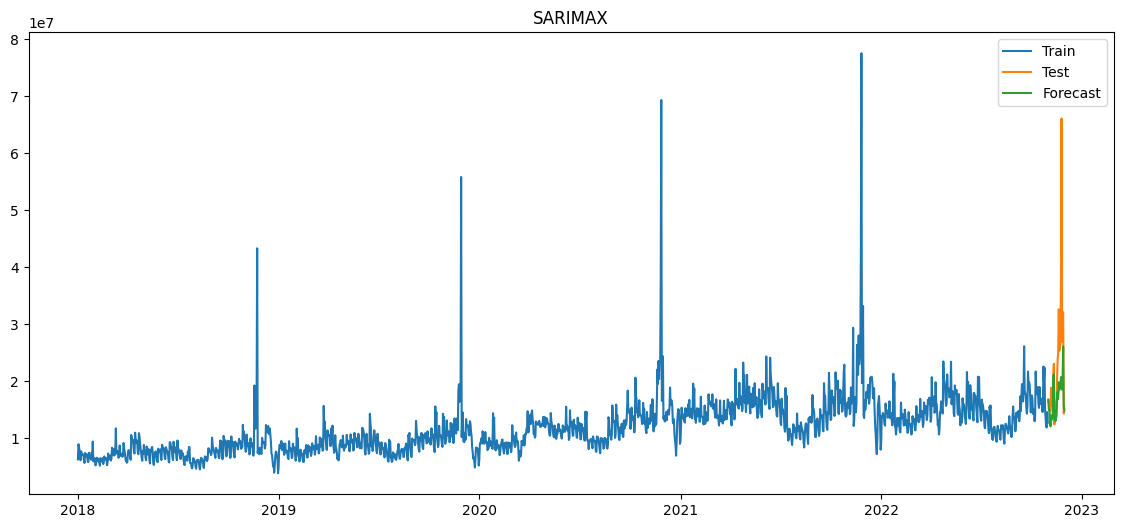

MAE 5716327.042129176
RMSE 10394396.812419357
MAPE 0.19359098435175184


In [91]:
model_assessment(train['y'],test['y'],predictions_sarimax,"SARIMAX","model_pred_sarimax")

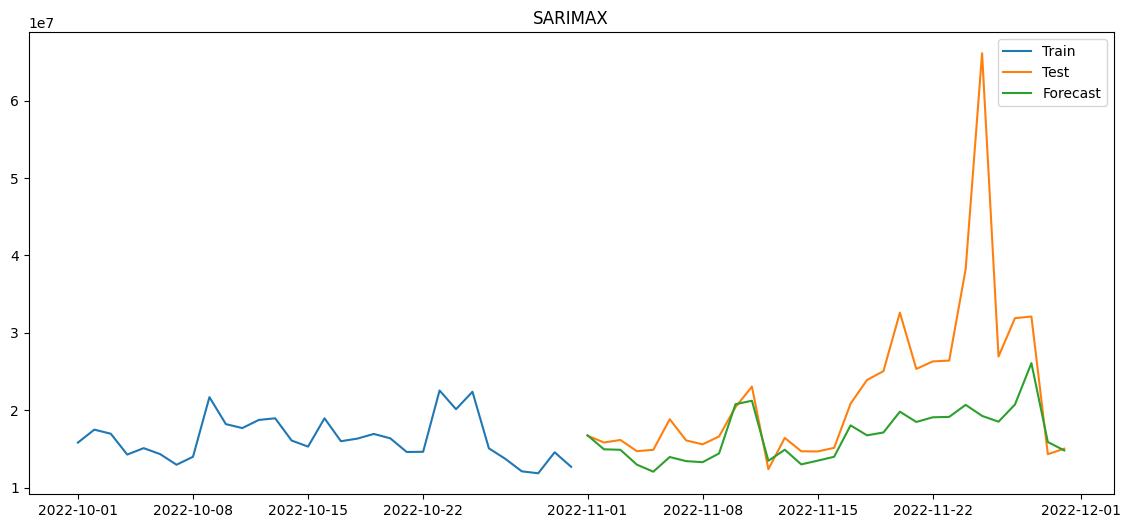

MAE 5716327.042129176
RMSE 10394396.812419357
MAPE 0.19359098435175184


In [93]:
model_assessment(train['y']['2022-10'],test['y'],predictions_sarimax,"SARIMAX","model_pred_sarimax_zoomed")